# Regresión lineal

In [31]:
import pandas as pd

csv_path = './data/rl1.csv'
df = pd.read_csv(csv_path)
df.head()

,x,y
0,24,133
1,35,187
2,36,189
3,36,183
4,42,220


In [25]:
X = df.drop('y', axis=1)
y = df['y']

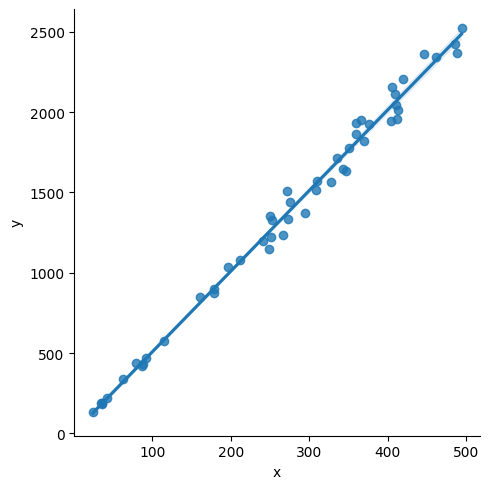

In [26]:
import seaborn as sns

sns.lmplot(data=df, x="x", y="y")

In [27]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y test
train, test = train_test_split(df, test_size=0.2)
X_train = train[['x']]
y_train = train['y']
X_test = test[['x']]
y_test = test['y']


### Configuración del modelo

In [28]:
from sklearn. linear_model import LinearRegression

model = LinearRegression()

# Ajuste del modelo
model.fit(X_train , y_train)

# Imprimir los coeficientes y la intersección
print("Coeficientes (pesos/importancia de cada característica):", model.coef_)
print("Intersección (valor de la variable dependiente cuando todas las características son cero):", model.intercept_)

Coeficientes (pesos/importancia de cada característica): [5.04052304]
Intersección (valor de la variable dependiente cuando todas las características son cero): 0.002664431733364836


### Predicción y métricas

In [29]:
from sklearn import metrics

# Métricas sobre el rendimiento del modelo

y_pred = model.predict(X_test)

# MSE: medida de cuánto se desvían las predicciones del modelo de los valores reales en el conjunto de prueba.
print ("MSE:", metrics.mean_squared_error(y_pred , y_test)) 

# R^2: medida de cuánto se ajustan las predicciones del modelo a los valores reales en el conjunto de prueba.
# R^2 = 1 indica un ajuste perfecto
# R^2 = 0 indica que el modelo no es mejor que el modelo que siempre predice la media de la variable dependiente
print ("R^2:", metrics.r2_score(y_pred , y_test))

MSE: 5626.118798888415
R^2: 0.981788507303946


### Visualización

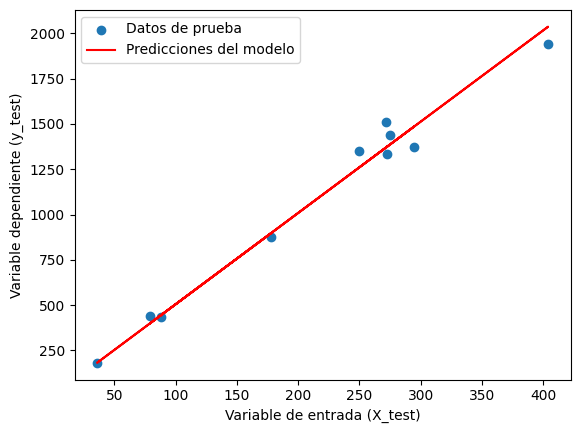

In [30]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con los datos de prueba
plt.scatter(X_test, y_test, label="Datos de prueba")

# Superponer la línea de predicciones del modelo en color rojo
plt.plot(X_test, y_pred, color="red", label="Predicciones del modelo")

# Añadir etiquetas y leyenda
plt.xlabel("Variable de entrada (X_test)")
plt.ylabel("Variable dependiente (y_test)")
plt.legend()

# Mostrar el gráfico
plt.show()
